In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('report_20221108.csv')

In [3]:
df1

,Country,Estimated earnings (USD),Page views,Page RPM (USD),Impressions,Impression RPM (USD),Active View Viewable,Clicks
0,India,85.56,193607,0.44,513708,0.17,0.4542,1577
1,United States,30.54,14041,2.17,32393,0.94,0.4668,146
2,Kenya,6.34,3258,1.95,5454,1.16,0.4176,136
3,United Arab Emirates,4.41,3086,1.43,7728,0.57,0.4372,44
4,United Kingdom,2.33,1833,1.27,3917,0.59,0.4513,19
...,...,...,...,...,...,...,...,...
174,Mauritania,0.00,1,0.00,3,0.00,0.0000,0
175,Palau,0.00,1,0.00,2,0.00,0.5000,0
176,St. Kitts & Nevis,0.00,1,0.36,4,0.09,0.7500,0
177,Turks & Caicos Islands,0.00,1,0.02,3,0.01,0.0000,0


In [5]:
top50 = df1['Country'].values.tolist()[0:50]

In [12]:
cartopy_country_lookup = {
    "Russia": "Russian Federation"
}

In [13]:
top50 = [cartopy_country_lookup[x] if x in cartopy_country_lookup else x for x in top50]

In [14]:
countries = {k:v for k, v in zip(top50, list(range(100, 50, -1)))}

In [15]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.feature import LAND

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import datetime

Done


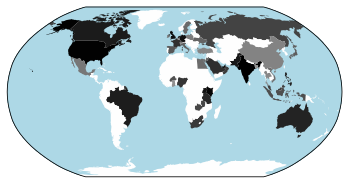

In [16]:
# Setting the color to shade the countries.
cmap = mpl.cm.Greys # Other color: mpl.cm.Blues


max_users = float(max(countries.values()))
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
ax = plt.axes(projection=ccrs.Robinson())

for country in shpreader.Reader(countries_shp).records():
    name = country.attributes['NAME_LONG']
    
    if name in countries:
        num_users = countries[name]
    else:
        num_users = 1
    
    # ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=cmap(num_users/max_users, 1))
    # TypeError: 'Polygon' object is not iterable
    # name: Fiji, type(country.geometry): [class 'shapely.geometry.multipolygon.MultiPolygon']
    # name: Tanzania, type(country.geometry): [class 'shapely.geometry.polygon.Polygon']
    
    try:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=cmap(num_users/max_users, 1))
    except Exception as e:
        #print(e)
        import shapely.wkt as wkt
        from shapely.geometry import MultiPolygon

        list_str_polygons = [str(country.geometry)]

        c = MultiPolygon(map(wkt.loads, list_str_polygons))
        ax.add_geometries(c, ccrs.PlateCarree(), facecolor=cmap(num_users/max_users, 1))

    ax.add_feature(cartopy.feature.OCEAN, color='lightblue')

#Save the image as a file.
plt.savefig('Audience_' + str(datetime.now()).replace(':', '_') + '.png', transparent=True, dpi=900)  
print("Done") 